In [1]:
%matplotlib inline
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import warnings
import random
import matplotlib.patches as patches

warnings.filterwarnings('ignore')
from collections import Counter
import sys
import os
from __future__ import division

plt.rcParams["figure.figsize"] = (20, 10)
from itertools import chain
import tqdm as tqdm

# from colorthief import ColorThief

warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
# SỬA: sưa lại tên file và sheet
dataRoot = pd.read_excel('Hack 13.6 tỷ tại tech (fb).xlsx', sheet_name=1)
print(dataRoot.shape)
dataRoot.head(100)

(8207, 37)


,PAGE NAME,PAGE ID,POST ID,TOTAL LIKE,TOTAL SHARE,TOTAL COMMENT,TTT,MESSAGE,SPAM,LABEL LEVEL 1,...,IS READED,LABEL LEVEL 2,NOTE TAG,NOTE 1,NOTE 2,NOTE 3,NOTE 4,NOTE 5,NOTE 6,BRAND
0,Oanh Le,100000128150849,100000128150849_5924708894209990,24924,9911,8276,43111,Tiếp tục vụ việc yêu cầu Téch com Bank giải qu...,NaN,NaN,...,READED,NaN,Tag 2,Hack/ Mất tiền tài khoản,Phàn nàn cách làm việc của NH,NaN,NaN,NaN,NaN,Banking
1,Hội những người đỡ không nổi những người khó đỡ,105560116141062,105560116141062_5598787400151612,23555,179,6781,30515,Sai lầm của tuổi trẻ:\n\nLàm thẻ Techcombank.,NaN,NaN,...,READED,NaN,Tag 2,Hack/ Mất tiền tài khoản,Phàn nàn cách làm việc của NH,NaN,NaN,NaN,NaN,Banking
2,Blog Tâm Sự,1439668462957308,1439668462957308_4667405726850216,20502,123,5596,26221,Sai lầm của tuổi trẻ:\nLàm thẻ Techcombank,NaN,NaN,...,READED,NaN,Tag 2,Hack/ Mất tiền tài khoản,Phàn nàn cách làm việc của NH,NaN,NaN,NaN,NaN,Banking
3,Phuong Hoang Tien,100003300906373,100003300906373_3111494332422386,7618,1050,3310,11978,Tech......com....bank thì cink roài. Hơn 13 tỏ...,NaN,NaN,...,READED,NaN,Tag 2,Hack/ Mất tiền tài khoản,Phàn nàn cách làm việc của NH,NaN,NaN,NaN,NaN,Banking
4,Oanh Le,100000128150849,100000128150849_5959781260702753,7807,1130,1754,10691,Thêm thông tin về buổi làm việc 16h ngày 27.04...,NaN,NaN,...,READED,NaN,Tag 2,Hack/ Mất tiền tài khoản,Phàn nàn cách làm việc của NH,NaN,NaN,NaN,NaN,Banking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Nguyễn Quang Anh,100071237984889,100071237984889_168998422151423,110,0,81,191,"Vừa thấy vụ Techcombank mất 13,6 Tỷ của khách\...",NaN,NaN,...,READED,NaN,Tag 2,Hack/ Mất tiền tài khoản,NaN,Phàn nàn cách làm việc của NH,NaN,NaN,NaN,Banking
96,Thanh Xuân Lê,100051023107066,100051023107066_524817749228991,146,0,44,190,Vừa thấy vụ Techcombank mất 13.6 Tỷ của khách\...,NaN,NaN,...,READED,NaN,Tag 2,Hack/ Mất tiền tài khoản,NaN,Phàn nàn cách làm việc của NH,NaN,NaN,NaN,Banking
97,Phạm Đăng Toàn,100041060418029,100041060418029_761417075236966,180,0,10,190,"Hôm trước thấy vụ Techcombank mất 13,6 Tỷ của ...",NaN,NaN,...,READED,NaN,Tag 2,Hack/ Mất tiền tài khoản,Phàn nàn cách làm việc của NH,NaN,NaN,NaN,NaN,Banking
98,Nguyen Tuan,100009016124807,100009016124807_3017223055254869,173,0,16,189,"Vừa thấy vụ Techcombank mất 13,6 Tỷ của khách\...",NaN,NaN,...,READED,NaN,Tag 2,Hack/ Mất tiền tài khoản,NaN,Phàn nàn cách làm việc của NH,NaN,NaN,NaN,Banking


In [3]:

# for index, row in data.iterrows():
#     if row['Source Name'] == row['Target Name']:
#         print(row['Source Name'], row['Target Name'])
#         newData = data.drop(row[index], axis=1)
# print(newData)

# handle bai post không bị lặp chính mình.
# dataPost = {}
# for index, row in dataRoot.iterrows():
#     if row['TYPE'] == 'POST':
#         dataPost[row['Source User']] = row['REACH']

# print(dataPost)
# hanlde data
# dataFilter = dataFilter.drop(dataFilter[(dataFilter.TTT < 5) & (dataFilter.TYPE == 'COMMENT')].index)
dataRoot = dataRoot.sort_values(by=['TTT'], ascending=False)
dataFilter = dataRoot.drop(dataRoot[(dataRoot.TYPE == 'COMMENT')].index)
# print(dataFilter)
print(dataFilter.shape)
data = dataFilter.groupby('MESSAGE').head()
print(data.shape)
data = data.groupby((data['USER NAME'] + data['PAGE NAME']), as_index=False).agg({'PAGE NAME': 'min', 'PAGE ID': 'min', 'USER ID': 'min', 'USER NAME': 'min', 'TYPE': 'min', 'TTT': 'sum'})
# SỬA: xóa bài post dưới x số lượng tương tác
# data = data.drop(data[(data.TTT < 10000) & (data.TYPE == 'POST')].index)

# SỬA: Chỉ lấy 5 bài viết nhiều tương tác nhất
data = data.sort_values(by=['TTT'], ascending=False)
data = data[data.TYPE == 'POST'][0:5]
listPost = list(data['PAGE NAME'])

dataComment = pd.DataFrame()
print(data.shape)
for index, row in data.iterrows():
    # SỬA: Lấy ra 5 comment nhiều tương tác nhất tương ứng vs các bài Post
    dataComment = dataComment.append(dataRoot.loc[(dataRoot['PAGE NAME'] == row['USER NAME']) & (dataRoot['TYPE'] == 'COMMENT')][0:5])
    # if row['USER NAME'] == row['PAGE NAME']:
    #     data.at[index, 'TTT'] = row['TTT'] / 2
print(dataComment.shape)
# print(data)
data = data.append(dataComment)
# data.head(10)
data.head(10)

# make link_url for tap nodes
linkUser = {}
for index, row in data.iterrows():
    linkUser[row['PAGE NAME']] = 'https://facebook.com/' + str(row['PAGE ID'])
    linkUser[row['USER NAME']] = 'https://facebook.com/' + str(row['USER ID'])
print(linkUser)

(3991, 37)
(2209, 37)
(5, 6)
(22, 37)
{'Oanh Le': 'https://facebook.com/100000128150849', 'Blog Tâm Sự': 'https://facebook.com/1439668462957308', 'Hội những người đỡ không nổi những người khó đỡ': 'https://facebook.com/105560116141062', 'Phuong Hoang Tien': 'https://facebook.com/100003300906373', 'Không Tên Không Số': 'https://facebook.com/100064402665376', 'Tony Chin': 'https://facebook.com/100001768293537', 'Mộc Mộc Lâm': 'https://facebook.com/100071950488364', 'Thịnh Phạm': 'https://facebook.com/100002926648310', 'Tuấn Nguyễn Anh': 'https://facebook.com/100007761940932', 'Ngọc Vy': 'https://facebook.com/100003248380802', 'Nam Bi': 'https://facebook.com/100010173105489', 'Kiều Linh': 'https://facebook.com/100007790288579', 'Nguyễn Thị Trúc Giang': 'https://facebook.com/100004956671316', 'Vũ Tuấn Thành': 'https://facebook.com/100026769151213', 'Lina Nguyen': 'https://facebook.com/100002697568086', 'Chang Chan': 'https://facebook.com/100057948324501', 'Suizen Trần': 'https://facebook.c

In [4]:
print(data.shape)
print(listPost)

(27, 37)
['Oanh Le', 'Blog Tâm Sự', 'Hội những người đỡ không nổi những người khó đỡ', 'Phuong Hoang Tien', 'Không Tên Không Số']


In [5]:
G = nx.from_pandas_edgelist(data,
                            source='USER NAME',
                            target='PAGE NAME',
                            edge_attr='TTT',
                            create_using=nx.DiGraph())
nx.set_node_attributes(G, linkUser, "linkUser")

In [6]:
data.head(10)

,PAGE NAME,PAGE ID,USER ID,USER NAME,TYPE,TTT,POST ID,TOTAL LIKE,TOTAL SHARE,TOTAL COMMENT,...,IS READED,LABEL LEVEL 2,NOTE TAG,NOTE 1,NOTE 2,NOTE 3,NOTE 4,NOTE 5,NOTE 6,BRAND
1200,Oanh Le,100000128150849,100000128150849,Oanh Le,POST,100478,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,Blog Tâm Sự,1439668462957308,1439668462957308,Blog Tâm Sự,POST,32310,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
495,Hội những người đỡ không nổi những người khó đỡ,105560116141062,105560116141062,Hội những người đỡ không nổi những người khó đỡ,POST,30515,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1252,Phuong Hoang Tien,100003300906373,100003300906373,Phuong Hoang Tien,POST,11978,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
537,Không Tên Không Số,100064402665376,100064402665376,Không Tên Không Số,POST,8675,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
773,Oanh Le,100000128150849,100001768293537,Tony Chin,COMMENT,17,5978162655531280_1130574737506820,17.0,0.0,0.0,...,NaN,NaN,NaN,Banking,NaN,NaN,NaN,NaN,NaN,NaN
772,Oanh Le,100000128150849,100001768293537,Tony Chin,COMMENT,17,5978162655531280_1130574737506820,17.0,0.0,0.0,...,NaN,NaN,NaN,Banking,NaN,NaN,NaN,NaN,NaN,NaN
1025,Oanh Le,100000128150849,100071950488364,Mộc Mộc Lâm,COMMENT,10,5959781260702753_1154308965419226,10.0,0.0,0.0,...,READED,NaN,Tag 2,Hack/ Mất tiền tài khoản,Phàn nàn cách làm việc của NH,NaN,NaN,NaN,NaN,Banking
1211,Oanh Le,100000128150849,100002926648310,Thịnh Phạm,COMMENT,7,5959781260702753_5083412385080288,7.0,0.0,0.0,...,READED,NaN,Tag 2,Hack/ Mất tiền tài khoản,Phàn nàn cách làm việc của NH,NaN,NaN,NaN,NaN,Banking
1396,Oanh Le,100000128150849,100007761940932,Tuấn Nguyễn Anh,COMMENT,5,5924708894209990_775877210067581,5.0,0.0,0.0,...,READED,NaN,Tag 2,Hack/ Mất tiền tài khoản,Phàn nàn cách làm việc của NH,NaN,NaN,NaN,NaN,Banking


In [7]:
print(nx.info(G))

DiGraph with 26 nodes and 26 edges


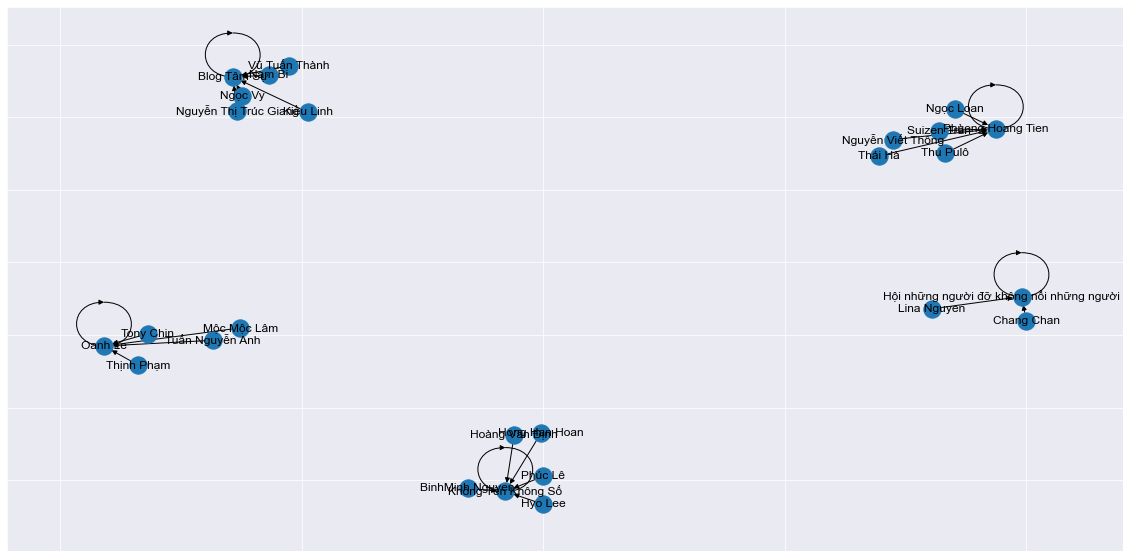

In [8]:
nx.draw_networkx(G)

In [9]:
weighted_degrees = dict(G.in_degree(weight='TTT'))
print(weighted_degrees)

{'Oanh Le': 100517, 'Blog Tâm Sự': 32311, 'Hội những người đỡ không nổi những người khó đỡ': 30515, 'Phuong Hoang Tien': 12453, 'Không Tên Không Số': 8679, 'Tony Chin': 0, 'Mộc Mộc Lâm': 0, 'Thịnh Phạm': 0, 'Tuấn Nguyễn Anh': 0, 'Ngọc Vy': 0, 'Nam Bi': 0, 'Kiều Linh': 0, 'Nguyễn Thị Trúc Giang': 0, 'Vũ Tuấn Thành': 0, 'Lina Nguyen': 0, 'Chang Chan': 0, 'Suizen Trần': 0, 'Ngọc Loan': 0, 'Nguyễn Viết Thông': 0, 'Thái Hà': 0, 'Thu Pulô': 0, 'Phúc Lê': 0, 'BinhMinh Nguyen': 0, 'Hyo Lee': 0, 'Hoàng Văn Định': 0, 'Hong Han Hoan': 0}


In [10]:
Gsub = G.edge_subgraph([(e[0],e[1]) for e in G.edges(data=True) if e[2]['TTT']>5])
print(nx.info(Gsub))

DiGraph with 13 nodes and 13 edges


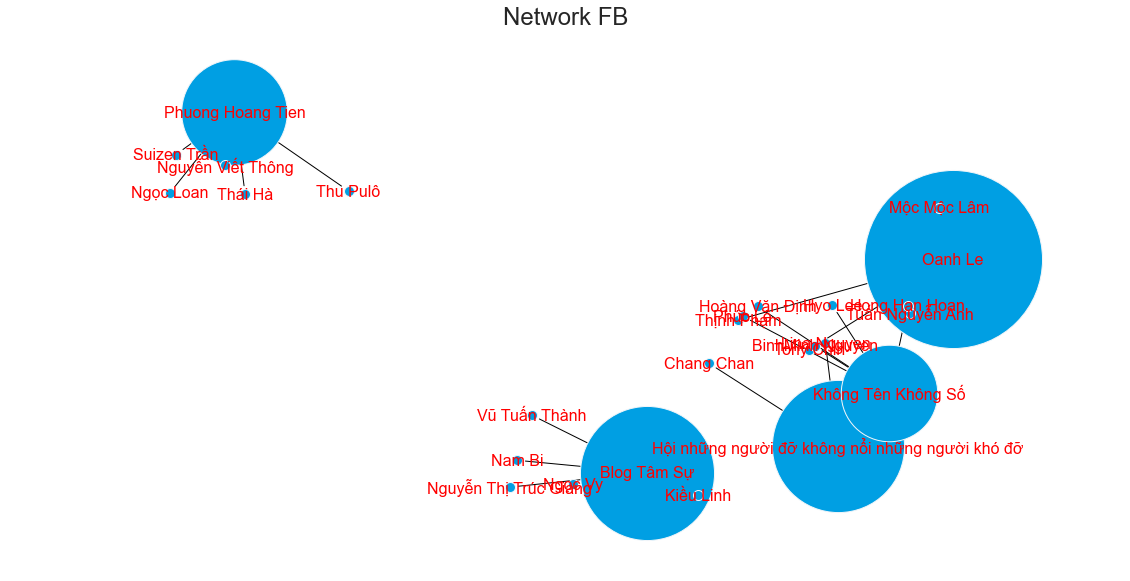

In [11]:
ax = plt.gca()
fig = plt.gcf()
ax.margins(0.20)
plt.axis('off')
plt.title('Network FB', fontsize=24)

# pos = nx.spring_layout(G)
pos = nx.spring_layout(G, k=0.5, iterations=60, scale = 10)

trans = ax.transData.transform
trans2 = fig.transFigure.inverted().transform

# tick_params = {'top': 'off', 'bottom': 'off', 'left': 'off', 'right': 'off',
#                'labelleft': 'off', 'labelbottom': 'off'}  #flag grid params
# styles = ['dotted','dashdot','dashed','solid'] # line styles


# draw edges
for e in G.edges(data=True):
    # width = max(e[2]['TTT'], 1) / 100  #normalize by max points
    nx.draw_networkx_edges(G, pos, edgelist=[e], width=1, style='solid')
    # in networkx versions >2.1 arrowheads can be adjusted

    # draw nodes
# for node in G.nodes():
#     print(node)
#     print(G.in_degree(node, weight='Point'))
#     imsize = max((0.3 * G.in_degree(node, weight='points')
#                   / max(dict(G.in_degree(weight='points')).values())) ** 2, 0.02)
#     print(imsize)
#     # size is proportional to the votes
#     # flag = mpl.image.imread(flags[node])
#
#     (x, y) = pos[node]
#     xx, yy = trans((x, y))  # figure coordinates
#     xa, ya = trans2((xx, yy))  # axes coordinates
#
#     # matplotlib.pyplot.axes
#     # them 1 truc vao hinh hien tai va bien no thanh truc hien tai.
#     # [left, bottom, width, height]
#     country = plt.axes([xa - imsize / 2.0, ya - imsize / 2.0, imsize, imsize])
#
#     # chen anh vao node
#     country.imshow(img[random.randint(0, N - 1)])
#     # ti le cua node. equal, auto, 0.7
#     country.set_aspect('equal')
#     # print(imsize/2)
#
#     # make cicle avatar
#     # patch = patches.Circle((xa, ya), radius=imsize/2.0, transform=ax.transData)
#     # country.set_clip_path(patch)
#     # country.tick_params(**tick_params)
#     country.axis('off')

# def nudge(poss):
#     return { n: (x, y - (100 * max(weighted_degrees[n], 1)**0.5)*0.0003) for n,(x,y) in poss.items()}
node_size = []
max_weight = max(weighted_degrees, key= lambda x: weighted_degrees[x])
for node in G.nodes():
    # print(node)
    # print(weighted_degrees[node])
    size = 100 * max(weighted_degrees[node], 1) ** 0.5
    size = max(size, 10)
    a = weighted_degrees[node]*100/weighted_degrees[max_weight]
    node_size.append(max(a, 10))
    G.nodes[node]['node_size'] = max(a, 10)

    # size = max(max(weighted_degrees[node], 1) ** 0.5, 50)
    # print(size)
    ns = nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=size, node_color='#009fe3')
    ns.set_edgecolor('#f2f6fa')
    # nx.draw_networkx_labels(G, pos, {node}, font_color='red');
# posNode = nudge(pos)

nx.draw_networkx_labels(G,pos,font_size=16,font_color='r')
fig.savefig('images/network-fb.png', facecolor='white')

In [12]:
new_val = max(weighted_degrees, key= lambda x: weighted_degrees[x])
print(new_val)

Oanh Le


In [17]:
import networkx as nx
from bokeh.io import output_file, show
from bokeh.models import (BoxZoomTool, Circle, HoverTool,
                          MultiLine, Plot, Range1d, ResetTool,
                          ColumnDataSource, OpenURL, TapTool, PointDrawTool, MultiSelect, Column, LabelSet)
from bokeh.plotting import from_networkx, figure, output_file, show
from bokeh.palettes import  Spectral4

# node_size = {k:max(100 * max(v, 1) ** 0.5,400) for k,v in G.degree().items()}
print(node_size)
# nx.set_node_attributes(G, node_size, name="node_size")
source=ColumnDataSource(pd.DataFrame.from_dict({k:v for k,v in G.nodes(data=True)},orient='index'))
print(source)
# print({k:v for k,v in G.nodes(data=True)})
print('======================================')
print(list(v for k,v in G.nodes(data=True)))


p = figure(plot_width=400, plot_height=400,
           tools="tap", title="Click the URL")

multiselect = MultiSelect(title = 'An cac bai viet', options = [(i, i) for i in listPost], value = [''])

def dropNode(attr, old, new):
    for line in new:
        if not p.select_one({"name": line}):
            index = listPost.index(line)
            print(index)

multiselect.on_change('value', dropNode)

g = from_networkx(G, pos, scale=1, center=(0,0))

node_hover_tool = HoverTool(tooltips=[("name", "@index"), ("linkFB", "@linkUser")])
p.add_tools(node_hover_tool, BoxZoomTool(), ResetTool())

# Configure tap tool
url = "@linkUser"
taptool = p.select(type=TapTool)
taptool.callback = OpenURL(url=url)

draw_tool = PointDrawTool(renderers=[g.node_renderer], empty_value='black')
p.add_tools(draw_tool)
p.toolbar.active_tap = draw_tool
g.node_renderer.data_source.data['node_size'] = node_size
g.node_renderer.glyph = Circle(size='node_size')

# g.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
# g.edge_renderer.glyph = MultiLine(line_alpha=0.7, line_width=1)
p.renderers.append(g)

x, y = zip(*g.layout_provider.graph_layout.values())
node_labels = list(G.nodes())
source = ColumnDataSource({'x': x, 'y': y,
                           'index': [node_labels[i] for i in range(len(x))]})
labels = LabelSet(x='x', y='y', text='index', source=source,
                  background_fill_color='white')

p.renderers.append(labels)

show(Column(p, multiselect))

You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/interaction/callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/server.html



[100.0, 32.144811325447435, 30.358048887252902, 12.38894913298248, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
ColumnDataSource(id='1861', ...)
[{'linkUser': 'https://facebook.com/100000128150849', 'node_size': 100.0}, {'linkUser': 'https://facebook.com/1439668462957308', 'node_size': 32.144811325447435}, {'linkUser': 'https://facebook.com/105560116141062', 'node_size': 30.358048887252902}, {'linkUser': 'https://facebook.com/100003300906373', 'node_size': 12.38894913298248}, {'linkUser': 'https://facebook.com/100064402665376', 'node_size': 10}, {'linkUser': 'https://facebook.com/100001768293537', 'node_size': 10}, {'linkUser': 'https://facebook.com/100071950488364', 'node_size': 10}, {'linkUser': 'https://facebook.com/100002926648310', 'node_size': 10}, {'linkUser': 'https://facebook.com/100007761940932', 'node_size': 10}, {'linkUser': 'https://facebook.com/100003248380802', 'node_size': 10}, {'linkUser': 'https://facebook.com/100010173105489

In [1]:
test = ['']
print(type(test))

<class 'list'>


In [3]:
if test != ['']:
    print(1)
else:
    print(2)

2


In [16]:
import networkx as nx
G = nx.path_graph(3)  # or DiGraph, MultiGraph, MultiDiGraph, etc
print(list(G.edges))
nodesremove = [node for node in G.nodes() if node == 0 or node ==2]
print(nodesremove)
# for u, attributes in G.nodes():
#     print(u)
#     print(attributes)
#     # if node == 1:
#     #     G.remove_node(int(node))
# for node1 in nodesremove:
#     G.remove_node(node1)
G.remove_nodes_from(nodesremove)
print(list(G.nodes))

[(0, 1), (1, 2)]
[0, 2]
[1]


1


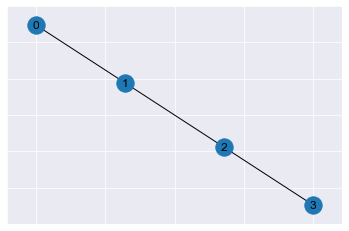

In [26]:
G = nx.path_graph(4)

print(G.degree(3))

nx.draw_networkx(G)

In [ ]:
pos = nx.spring_layout(G, k=0.5, iterations=60, scale=10)
max_weight = max(weighted_degrees, key=lambda x: weighted_degrees[x])
node_size = [max(weighted_degrees[node] * 100 / weighted_degrees[max_weight], 10) for node in G.nodes()]

p = figure(width=1500, height=800, tools="tap", title="FB Network")

network_multiseclect = MultiSelect(title='An cac bai viet', options=[(i, i) for i in listPost], value=[''])


In [4]:
test = [1,23,3,5,6,7,12,12]
test1 = (a*2 for a in test)
print(list(test1))

[2, 46, 6, 10, 12, 14, 24, 24]
